# Intrinsic properties - Classification with Logistic Regression 

### Load Data

In [7]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('OneDrive - University of Bristol/Documents/Python Coding_Data Science Course/Github/data_science_portfolio/Datasets/intrinsic_cluster_analysis.csv')
data.head(5)

### Data pre-processing: 
##### - Drop unwanted generated columns
##### - Post-hoc add cluster assigned column that will become the target variable

In [2]:
cleaned_data = data.drop(['Unnamed: 0'], axis = 1) #drop unwanted columns
cleaned_data.rename(columns={'Unnamed: 6':'Putative Cell Type'}, inplace=True) #Rename Column with putative cell type
cleaned_data.loc[0:16, 'Putative Cell Type'] = 'VIP+'
cleaned_data.loc[17:45, 'Putative Cell Type'] = 'NDNF-Like'
cleaned_data.loc[46:, 'Putative Cell Type'] = 'Jini Cells'
print(cleaned_data.info())
cleaned_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Delay               67 non-null     float64
 1   Rheobase            67 non-null     float64
 2   Rin                 67 non-null     float64
 3   tau                 67 non-null     float64
 4   Max                 67 non-null     float64
 5   Putative Cell Type  67 non-null     object 
dtypes: float64(5), object(1)
memory usage: 3.3+ KB
None


,Delay,Rheobase,Rin,tau,Max,Putative Cell Type
0,27.90,75.8,258.000,12.3000,143.0,VIP+
1,331.90,44.8,412.000,13.4708,66.0,VIP+
2,134.80,36.0,536.500,23.9807,64.0,VIP+
3,176.80,26.6,692.000,27.1597,25.0,VIP+
4,41.42,104.0,318.632,13.0589,30.0,VIP+


In [3]:
pal = sns.color_palette('magma')
print (pal.as_hex())
pal.as_hex()

['#221150', '#5f187f', '#982d80', '#d3436e', '#f8765c', '#febb81']


['#221150', '#5f187f', '#982d80', '#d3436e', '#f8765c', '#febb81']

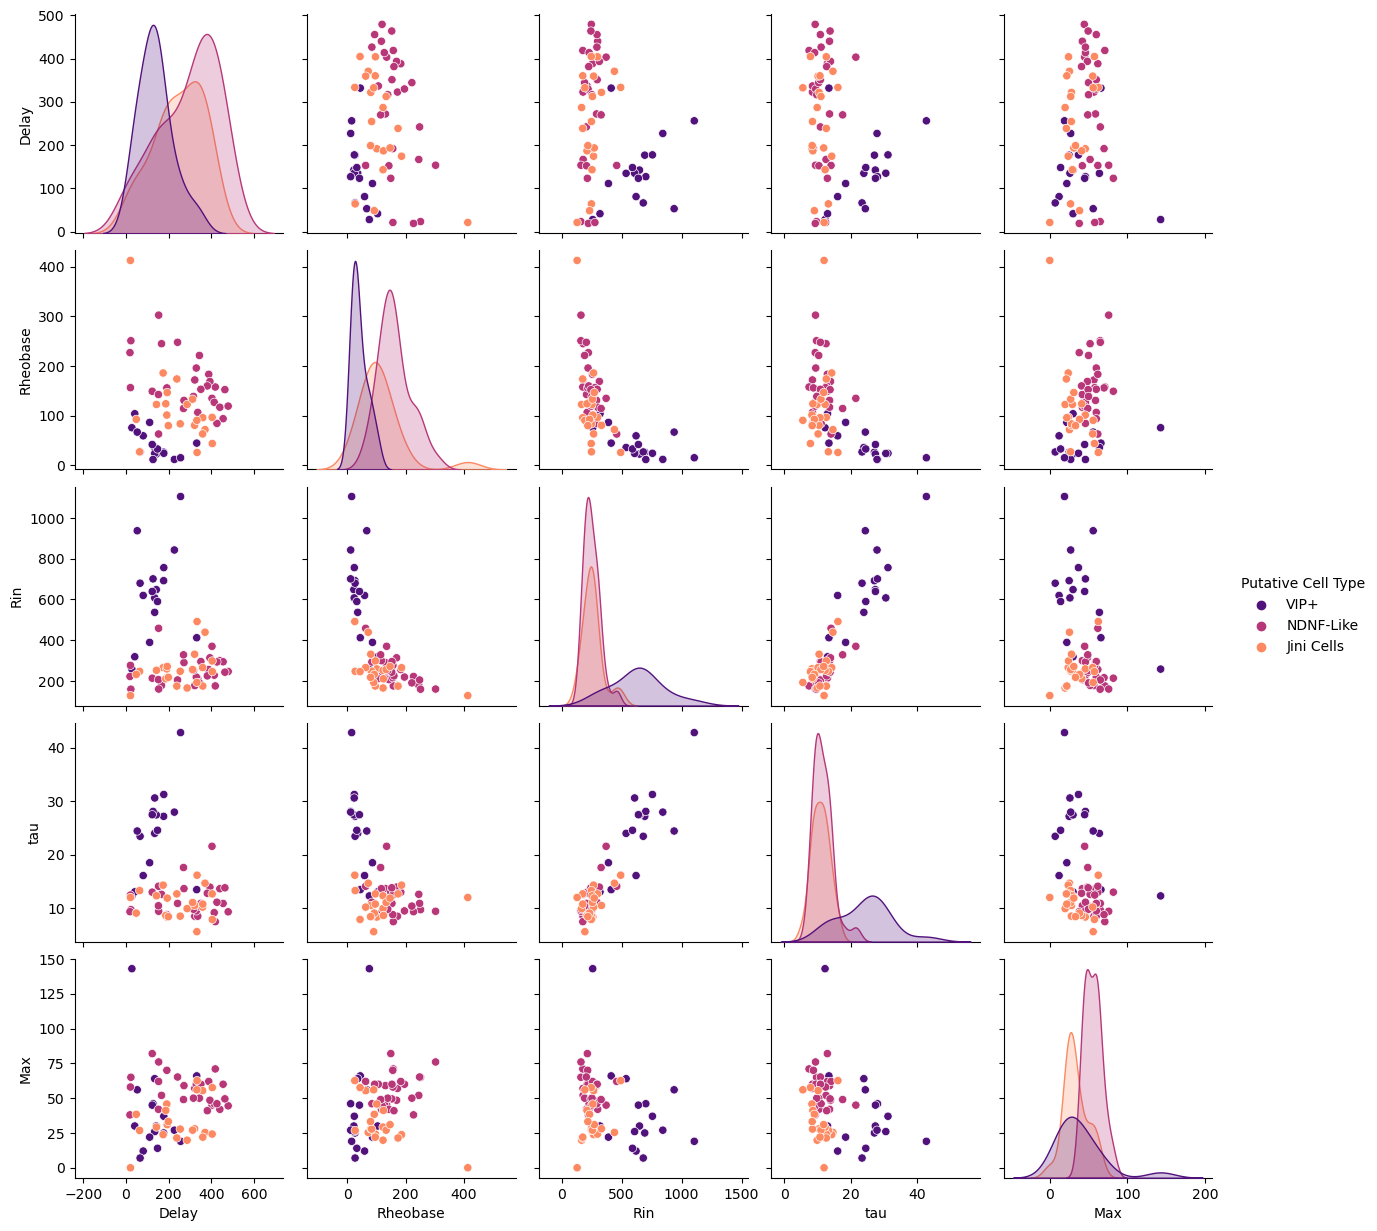

In [4]:
#Quick Pair plot to look at overall data distribution

pairplot_kde = sns.pairplot(cleaned_data, diag_kind="kde", hue='Putative Cell Type', palette="magma")
plt.show()

### Data pre-processing: Search for outliers in data

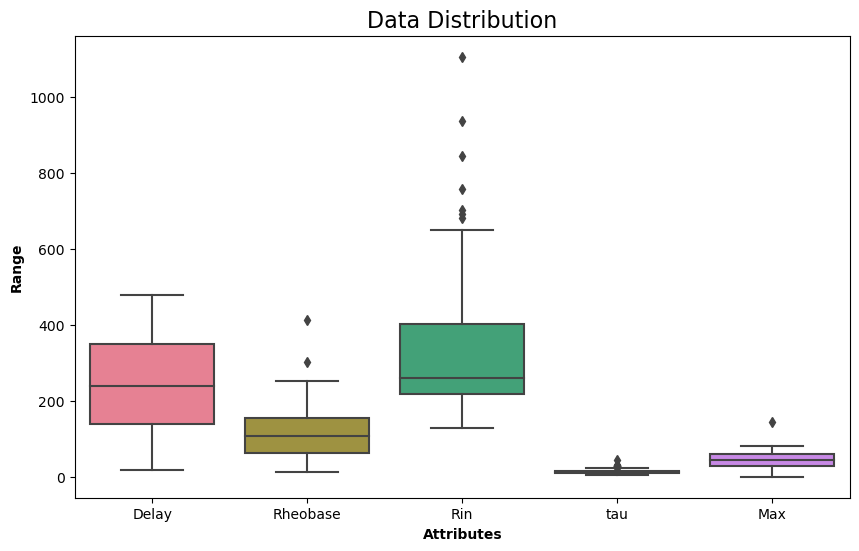

In [5]:
def show_boxplot(df):
    plt.rcParams['figure.figsize'] = [10,6]
    sns.boxplot(data = df, orient="v", palette='husl')
    plt.title("Data Distribution", fontsize = 16)
    plt.ylabel("Range", fontweight = 'bold')
    plt.xlabel("Attributes", fontweight = 'bold')
   
show_boxplot(cleaned_data)

### Data pre-processing: Standard scaling of data to avoid skewing in direction of largest value

    Delay  Rheobase      Rin      tau    Max
0   27.90      75.8  258.000  12.3000  143.0
1  331.90      44.8  412.000  13.4708   66.0
2  134.80      36.0  536.500  23.9807   64.0
3  176.80      26.6  692.000  27.1597   25.0
4   41.42     104.0  318.632  13.0589   30.0
Scaled data shape is (67, 5)


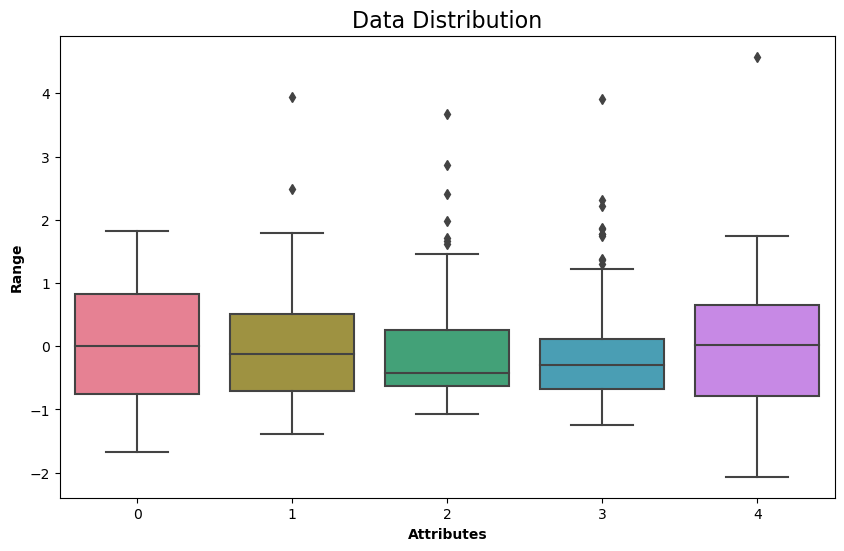

In [6]:
from sklearn.preprocessing import StandardScaler

data_scaler = StandardScaler()

df = pd.DataFrame(cleaned_data.iloc[:,:5]) #dropping putative cell type as scaling will affect it weirdly
print (df.head())

scaled_data = data_scaler.fit_transform(df)
print ('Scaled data shape is',scaled_data.shape) #The shape of the data remains the same as the cleaned data (46 rows, 5 columns) because the normalization does not affect the same of the data.

show_boxplot(scaled_data)

In [7]:
#Re-append 'putative cell type' column onto data frame
df_scaled_data = pd.DataFrame(scaled_data)
df_scaled_data['Putative Cell Type'] = cleaned_data['Putative Cell Type']
df_scaled_data.head()

,0,1,2,3,4,Putative Cell Type
0,-1.597525,-0.532602,-0.435153,-0.318385,4.578711,VIP+
1,0.701864,-0.944776,0.312130,-0.156236,1.002232,VIP+
2,-0.788957,-1.061780,0.916265,1.299325,0.909337,VIP+
3,-0.471278,-1.186761,1.670826,1.739598,-0.902127,VIP+
4,-1.495263,-0.157658,-0.140937,-0.213282,-0.669888,VIP+


In [8]:
#Rename columns
df_scaled_data.rename(columns={0:'Delay', 1:'Rheobase', 2:'Input Resistance', 3:'Decay Tau', 4:'Max Firing'}, inplace=True) 
df_scaled_data.head()

,Delay,Rheobase,Input Resistance,Decay Tau,Max Firing,Putative Cell Type
0,-1.597525,-0.532602,-0.435153,-0.318385,4.578711,VIP+
1,0.701864,-0.944776,0.312130,-0.156236,1.002232,VIP+
2,-0.788957,-1.061780,0.916265,1.299325,0.909337,VIP+
3,-0.471278,-1.186761,1.670826,1.739598,-0.902127,VIP+
4,-1.495263,-0.157658,-0.140937,-0.213282,-0.669888,VIP+


## Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Running the logistic regression such that the training data is index loc'd to row 46 without train test split

In [10]:
df_scaled_data_train = df_scaled_data.iloc[:46,:]

X = df_scaled_data_train.drop(['Putative Cell Type'], axis=1)
y = df_scaled_data_train['Putative Cell Type']

model = LogisticRegression()
model.fit(X, y)

model_acc = accuracy_score(y, model.predict(X))
print('Model accuracy is:', model_acc)

from sklearn.metrics import roc_auc_score

model_roc = roc_auc_score(y, model.predict_proba(X)[:, 1])
print("Model_ROC_AUC score is: ", model_roc)

Model accuracy is: 0.9565217391304348
Model_ROC_AUC score is:  0.9918864097363084


#### Use shapley values to see feature importance

In [11]:
import shap
LR_shap = LogisticRegression().fit(X, y)

explainer = shap.Explainer(LR_shap, X)
shap_values = explainer(X)

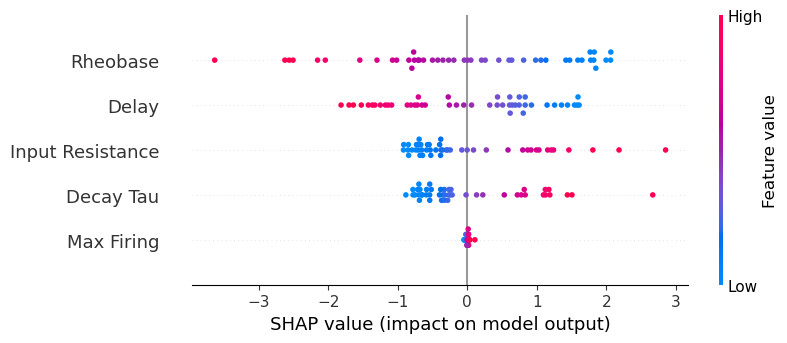

In [30]:
shap.plots.beeswarm(shap_values)

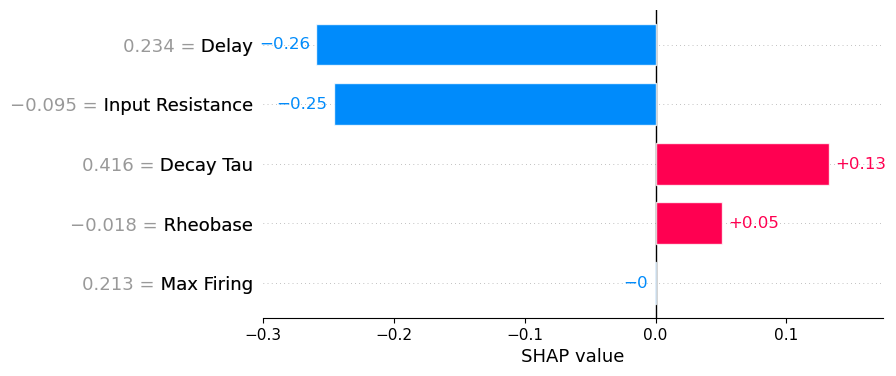

In [13]:
shap.plots.bar(shap_values[45]) # Checking for cell number '46'

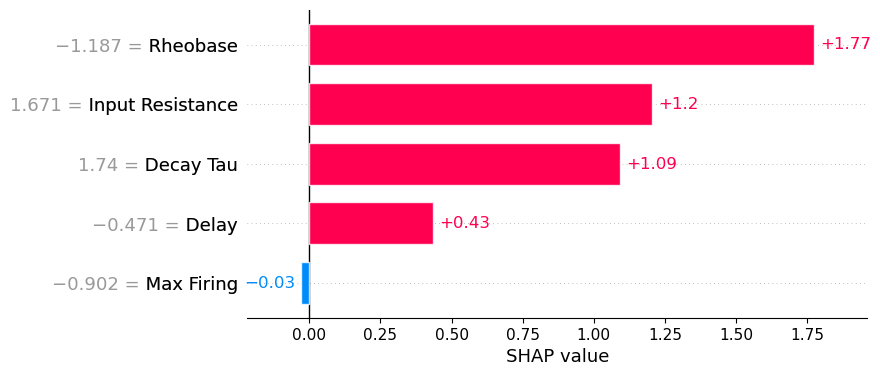

In [14]:

shap.plots.bar(shap_values[3]) # Checking for cell number '4'

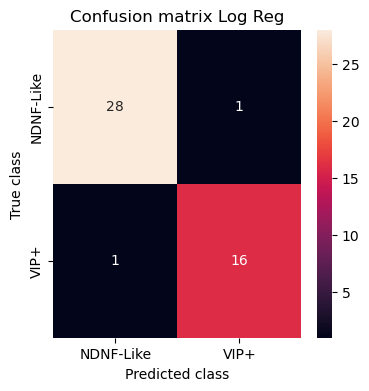

In [31]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X)

cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(4,4))
sns.heatmap(cm, xticklabels=['NDNF-Like', 'VIP+'], yticklabels=['NDNF-Like', 'VIP+'], annot=True, fmt='d')
plt.title("Confusion matrix Log Reg")
plt.ylabel("True class")
plt.xlabel("Predicted class")
plt.show()

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

   NDNF-Like       0.97      0.97      0.97        29
        VIP+       0.94      0.94      0.94        17

    accuracy                           0.96        46
   macro avg       0.95      0.95      0.95        46
weighted avg       0.96      0.96      0.96        46



### Running the logistic regression such that the class values of 'Jini ccells' are now predicted

In [17]:
X_LR = df_scaled_data.drop(['Putative Cell Type'],axis = 1)
LR = model.predict(X_LR)

In [18]:
LR

array(['VIP+', 'NDNF-Like', 'VIP+', 'VIP+', 'VIP+', 'VIP+', 'VIP+',
       'VIP+', 'VIP+', 'VIP+', 'VIP+', 'VIP+', 'VIP+', 'VIP+', 'VIP+',
       'VIP+', 'VIP+', 'NDNF-Like', 'NDNF-Like', 'NDNF-Like', 'NDNF-Like',
       'NDNF-Like', 'NDNF-Like', 'NDNF-Like', 'NDNF-Like', 'NDNF-Like',
       'NDNF-Like', 'NDNF-Like', 'NDNF-Like', 'NDNF-Like', 'NDNF-Like',
       'NDNF-Like', 'VIP+', 'NDNF-Like', 'NDNF-Like', 'NDNF-Like',
       'NDNF-Like', 'NDNF-Like', 'NDNF-Like', 'NDNF-Like', 'NDNF-Like',
       'NDNF-Like', 'NDNF-Like', 'NDNF-Like', 'NDNF-Like', 'NDNF-Like',
       'NDNF-Like', 'NDNF-Like', 'NDNF-Like', 'VIP+', 'NDNF-Like',
       'NDNF-Like', 'NDNF-Like', 'NDNF-Like', 'NDNF-Like', 'NDNF-Like',
       'NDNF-Like', 'NDNF-Like', 'NDNF-Like', 'NDNF-Like', 'VIP+',
       'NDNF-Like', 'NDNF-Like', 'NDNF-Like', 'NDNF-Like', 'NDNF-Like',
       'NDNF-Like'], dtype=object)

In [19]:
cleaned_data = pd.concat ([cleaned_data, pd.DataFrame(LR, columns =['LR_Clusters'])], axis=1) #append column onto main dataframe
cleaned_data

,Delay,Rheobase,Rin,tau,Max,Putative Cell Type,LR_Clusters
0,27.900000,75.80,258.000,12.3000,143.0,VIP+,VIP+
1,331.900000,44.80,412.000,13.4708,66.0,VIP+,NDNF-Like
2,134.800000,36.00,536.500,23.9807,64.0,VIP+,VIP+
3,176.800000,26.60,692.000,27.1597,25.0,VIP+,VIP+
4,41.420000,104.00,318.632,13.0589,30.0,VIP+,VIP+
...,...,...,...,...,...,...,...
62,332.633343,90.67,192.530,5.6200,56.0,Jini Cells,NDNF-Like
63,193.566657,146.67,270.960,11.8900,31.0,Jini Cells,NDNF-Like
64,48.466670,92.67,231.920,9.0900,38.4,Jini Cells,NDNF-Like
65,21.166670,412.67,127.940,12.0100,0.0,Jini Cells,NDNF-Like


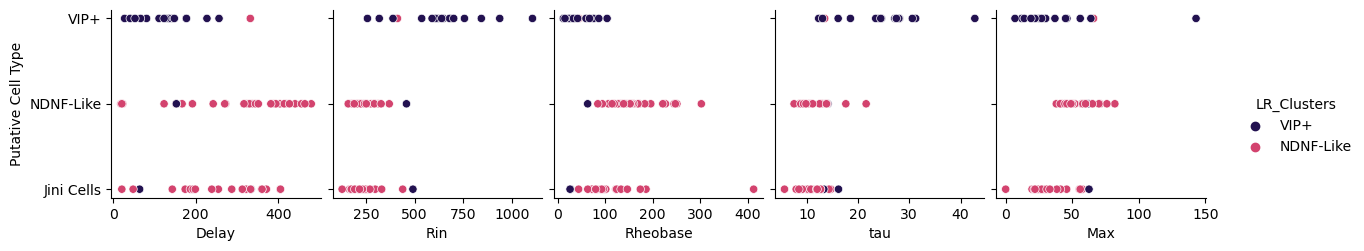

In [20]:
sns.pairplot(
    cleaned_data, 
    x_vars=['Delay', 'Rin', 'Rheobase', 'tau', 'Max'],
    y_vars=['Putative Cell Type'],
    diag_kind="kde", 
    hue='LR_Clusters', 
    palette= {'VIP+':'#221150', 'NDNF-Like':'#d3436e'},
)
plt.show()

### Classification with Random Forests

In [21]:
from sklearn.ensemble import RandomForestClassifier

df_scaled_data_clf = df_scaled_data.iloc[:46,:]
X_clf = df_scaled_data_clf.drop('Putative Cell Type', axis=1)
y_clf = df_scaled_data_clf['Putative Cell Type']
print (X_clf.head(5), y_clf.head(5))

      Delay  Rheobase  Input Resistance  Decay Tau  Max Firing
0 -1.597525 -0.532602         -0.435153  -0.318385    4.578711
1  0.701864 -0.944776          0.312130  -0.156236    1.002232
2 -0.788957 -1.061780          0.916265   1.299325    0.909337
3 -0.471278 -1.186761          1.670826   1.739598   -0.902127
4 -1.495263 -0.157658         -0.140937  -0.213282   -0.669888 0    VIP+
1    VIP+
2    VIP+
3    VIP+
4    VIP+
Name: Putative Cell Type, dtype: object


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_clf, y_clf, test_size = 0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, max_depth=4)

clf.fit(X_train, y_train)

print("Accuracy on training set {}".format(clf.score(X_train, y_train)))

y_pred = clf.predict(X_test)

print("Accuracy on test set {}".format(accuracy_score(y_test, y_pred)))

Accuracy on training set 1.0
Accuracy on test set 0.9


In [23]:
X_clf_test = df_scaled_data.drop(['Putative Cell Type'],axis = 1)
CLF = clf.predict(X_clf_test)
CLF

array(['VIP+', 'VIP+', 'VIP+', 'VIP+', 'NDNF-Like', 'VIP+', 'VIP+',
       'VIP+', 'VIP+', 'VIP+', 'VIP+', 'VIP+', 'VIP+', 'VIP+', 'VIP+',
       'VIP+', 'VIP+', 'NDNF-Like', 'NDNF-Like', 'NDNF-Like', 'NDNF-Like',
       'NDNF-Like', 'NDNF-Like', 'NDNF-Like', 'NDNF-Like', 'NDNF-Like',
       'NDNF-Like', 'NDNF-Like', 'NDNF-Like', 'NDNF-Like', 'NDNF-Like',
       'NDNF-Like', 'NDNF-Like', 'NDNF-Like', 'NDNF-Like', 'NDNF-Like',
       'NDNF-Like', 'NDNF-Like', 'NDNF-Like', 'NDNF-Like', 'NDNF-Like',
       'NDNF-Like', 'NDNF-Like', 'NDNF-Like', 'NDNF-Like', 'NDNF-Like',
       'NDNF-Like', 'NDNF-Like', 'NDNF-Like', 'VIP+', 'NDNF-Like',
       'NDNF-Like', 'NDNF-Like', 'NDNF-Like', 'NDNF-Like', 'NDNF-Like',
       'NDNF-Like', 'NDNF-Like', 'NDNF-Like', 'NDNF-Like', 'VIP+',
       'NDNF-Like', 'NDNF-Like', 'NDNF-Like', 'NDNF-Like', 'NDNF-Like',
       'NDNF-Like'], dtype=object)

In [24]:
cleaned_data = pd.concat ([cleaned_data, pd.DataFrame(CLF, columns =['CLF_Clusters'])], axis=1) #append column onto main dataframe
cleaned_data.tail(5)

,Delay,Rheobase,Rin,tau,Max,Putative Cell Type,LR_Clusters,CLF_Clusters
62,332.633343,90.67,192.53,5.62,56.0,Jini Cells,NDNF-Like,NDNF-Like
63,193.566657,146.67,270.96,11.89,31.0,Jini Cells,NDNF-Like,NDNF-Like
64,48.466670,92.67,231.92,9.09,38.4,Jini Cells,NDNF-Like,NDNF-Like
65,21.166670,412.67,127.94,12.01,0.0,Jini Cells,NDNF-Like,NDNF-Like
66,198.900000,80.00,217.55,8.43,33.2,Jini Cells,NDNF-Like,NDNF-Like


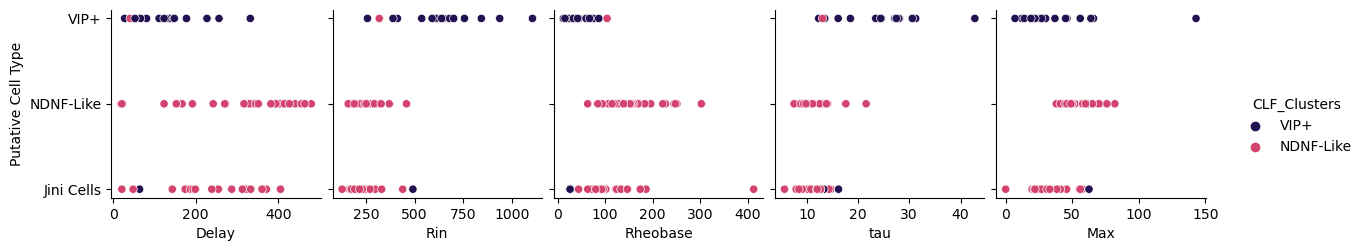

In [25]:
sns.pairplot(
    cleaned_data, 
    x_vars=['Delay', 'Rin', 'Rheobase', 'tau', 'Max'],
    y_vars=['Putative Cell Type'],
    diag_kind="kde", 
    hue='CLF_Clusters', 
    palette= {'VIP+':'#221150', 'NDNF-Like':'#d3436e'},
)
plt.show()

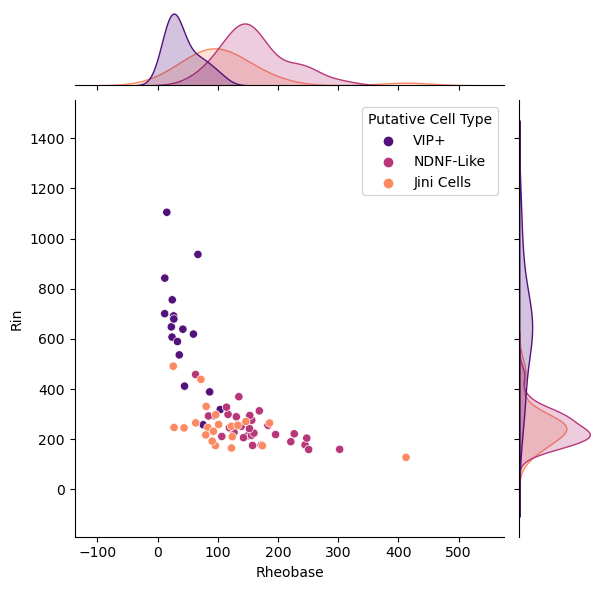

In [28]:
sns.jointplot(data=cleaned_data,
            x='Rheobase', 
            y='Rin', 
            hue='Putative Cell Type',
            kind= 'scatter',
            palette = 'magma'
            )